In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import collections

# Load and visualize an example graph

We will use Zachary's Karate Club, a social network showing the interactions between members outside of the club.

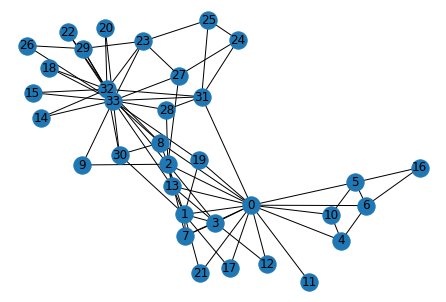

In [ ]:
# Load the graph
G_karate = nx.karate_club_graph()
# Define position of each node
pos = nx.spring_layout(G_karate)
# Plot the graph
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

# Question: What kind of graph is G_lesmis?

# General info from a graph

Let's look at the nodes and edges in the network. The node names here are numbers (0, 1, 2, ...). To manipulate them array with node names and edge names, we need to convert to a python list.

In [ ]:
#G_karate.nodes() is a networkx object, we can convert it to a normal python list to manipulate it
#G_karate.edges() is a networkx object, we can convert it to a normal python list to manipulate it
lesmis_nodes =  list(G_karate.nodes())
lesmis_edges =  list(G_karate.edges())

print("Nodes",lesmis_nodes)
print("Edges",lesmis_edges)

Nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Edges [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


# Adjacent nodes (neighbors) and Degree

We can get neighbors of each node.

In [ ]:
neighbors_node0=list(G_karate.neighbors(0))
neighbors_node1=list(G_karate.neighbors(1))
neighbors_node5=list(G_karate.neighbors(5))
print("neighbors node 0",neighbors_node0)
print("neighbors node 1",neighbors_node1)
print("neighbors node 5",neighbors_node5)

neighbors node 0 [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]
neighbors node 1 [0, 2, 3, 7, 13, 17, 19, 21, 30]
neighbors node 5 [0, 6, 10, 16]


In [ ]:
# The nx.degree function outputs the degree of each node in the network
nx.degree(G_karate)

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [ ]:
# The nx.degree function outputs the degree of each node in the network
nx.degree(G_karate)

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [ ]:
# Through some manipulation, you can rank the nodes by degree in a list of tuples
degree_count = sorted(G_karate.degree, key=lambda x: x[1], reverse=True)
# Prepare two tuples that you can plot against each other
node, degree = zip(*degree_count)
print(node)
print(degree)

(33, 0, 32, 2, 1, 3, 31, 8, 13, 23, 5, 6, 7, 27, 29, 30, 4, 10, 19, 24, 25, 28, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 11)
(17, 16, 12, 10, 9, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1)


<BarContainer object of 34 artists>

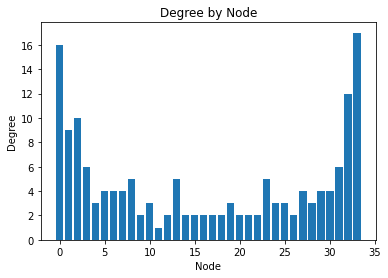

In [ ]:
# Plot the degree of each node
ax = plt.subplot(111)
ax.set_title('Degree by Node')
ax.set_xlabel('Node')
ax.set_ylabel('Degree')
ax.bar(node,degree)

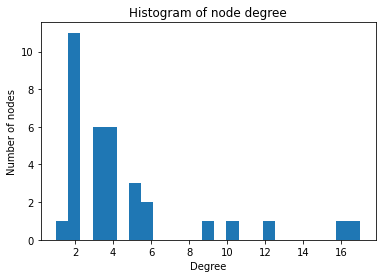

In [ ]:
plt.hist(degree,bins=25)
plt.title('Histogram of node degree')
plt.ylabel('Number of nodes')
plt.xlabel('Degree')
plt.show()

# Distances

In [ ]:
paths=nx.shortest_path(G_karate)
distances=dict(nx.shortest_path_length(G_karate))
print("Shortest path between node 0 and 14:",paths[0][14])
print("Distance between node 0 and 14:",distances[0][14])

Shortest path between node 0 and 14: [0, 2, 32, 14]
Distance between node 0 and 14: 3


<BarContainer object of 34 artists>

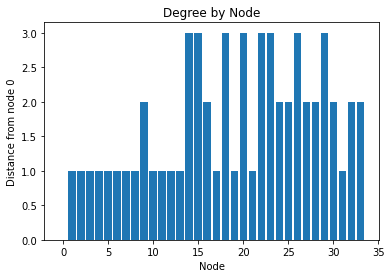

In [ ]:
#Plot the distance from node 0 to other nodes
nodes=list(distances[0].keys())
distances_0=list(distances[0].values())

ax = plt.subplot(111)
ax.set_title('Degree by Node')
ax.set_xlabel('Node')
ax.set_ylabel('Distance from node 0')
ax.bar(nodes,distances_0)

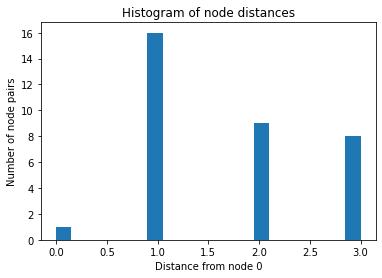

In [ ]:
#Plot the distribution of distances from node 0
plt.hist(distances_0,bins=20)
plt.title('Histogram of node distances')
plt.ylabel('Number of node pairs')
plt.xlabel('Distance from node 0')
plt.show()

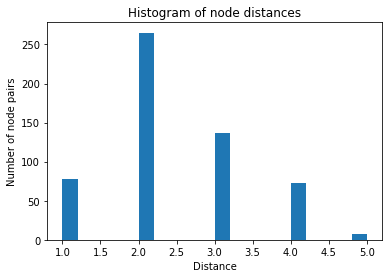

In [ ]:
#Plot the distribution of distances from all nodes
distances_vals=[distances[n1][n2] for n1 in G_karate.nodes() for n2 in G_karate.nodes() if n1>n2]
plt.hist(distances_vals,bins=20)
plt.title('Histogram of node distances')
plt.ylabel('Number of node pairs')
plt.xlabel('Distance')
plt.show()

# Betweenness Centrality

In [ ]:
# You can generate a dictionary containing the node and the BC
betweenness = nx.betweenness_centrality(G_karate)
# Make values into a list
bc = list(betweenness.values())
print(bc)

[0.43763528138528146, 0.053936688311688304, 0.14365680615680618, 0.011909271284271283, 0.0006313131313131313, 0.02998737373737374, 0.029987373737373736, 0.0, 0.05592682780182781, 0.0008477633477633478, 0.0006313131313131313, 0.0, 0.0, 0.04586339586339586, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03247504810004811, 0.0, 0.0, 0.0, 0.017613636363636363, 0.0022095959595959595, 0.0038404882154882154, 0.0, 0.02233345358345358, 0.0017947330447330447, 0.0029220779220779218, 0.014411976911976909, 0.13827561327561325, 0.145247113997114, 0.30407497594997596]


<BarContainer object of 34 artists>

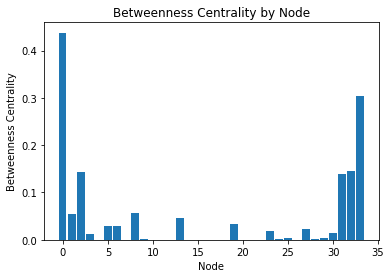

In [ ]:
# Plot
ax = plt.subplot(111)
ax.set_title('Betweenness Centrality by Node')
ax.set_xlabel('Node')
ax.set_ylabel('Betweenness Centrality')
# Plot with the nodes in the network as the x axis
ax.bar(G_karate.nodes(), bc)

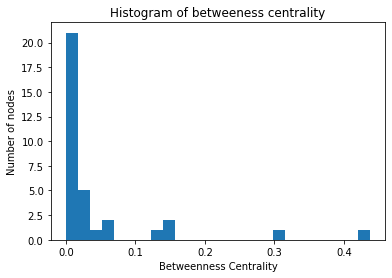

In [ ]:
plt.hist(bc,bins=25)
plt.title('Histogram of betweeness centrality')
plt.ylabel('Number of nodes')
plt.xlabel('Betweenness Centrality')
plt.show()

# Degree Centrality

Degree centrality is just the node degree normalized by network size

In [ ]:
degree_centrality = nx.degree_centrality(G_karate)
degree_cent = list(degree_centrality.values())

<BarContainer object of 34 artists>

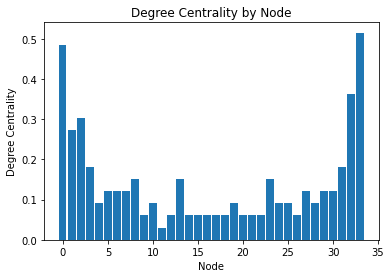

In [ ]:
ax = plt.subplot(111)
ax.set_title('Degree Centrality by Node')
ax.set_xlabel('Node')
ax.set_ylabel('Degree Centrality')
ax.bar(G_karate.nodes(), degree_cent)

## Communities using networkx

Using modularity maximization

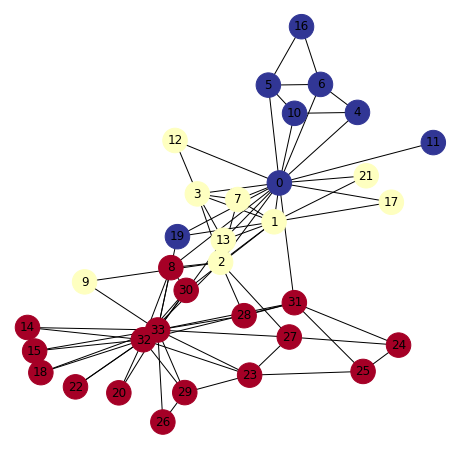

In [ ]:
from networkx.algorithms import community as nxcommunity

communities_modularity = list(nxcommunity.greedy_modularity_communities(G_karate))
communities_modularity_dictionary_temp={node:i for i,community in enumerate(communities_modularity) for node in community}
communities_modularity_dictionary={node:communities_modularity_dictionary_temp[node] for node in list(G_karate.nodes())}


communities_dictionary=communities_modularity_dictionary
plt.figure(figsize=(8, 8))
plt.axis('off')

nx.draw_networkx(G_karate, pos, node_size=600,with_labels=True, cmap=plt.cm.RdYlBu, node_color=list(communities_dictionary.values()))
plt.show(G_karate)

Using label propagation

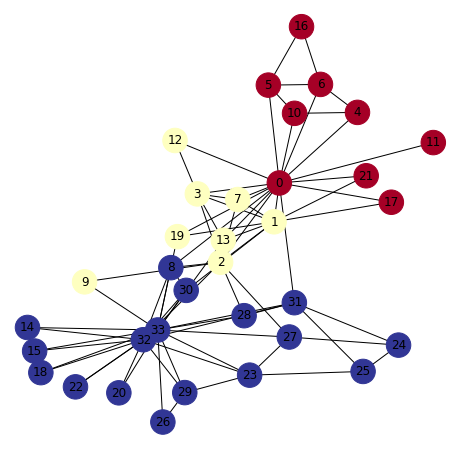

In [ ]:
communities_labelprop = list(nxcommunity.label_propagation.asyn_lpa_communities(G_karate,seed=10))
communities_labelprop_dictionary_temp={node:i for i,community in enumerate(communities_labelprop) for node in community}
communities_labelprop_dictionary={node:communities_labelprop_dictionary_temp[node] for node in list(G_karate.nodes())}

plt.figure(figsize=(8, 8))
plt.axis('off')

communities_dictionary=communities_labelprop_dictionary
nx.draw_networkx(G_karate, pos, node_size=600,with_labels=True, cmap=plt.cm.RdYlBu, node_color=list(communities_dictionary.values()))
plt.show(G_karate)


In [ ]:
## Communities using networkx

## COVID-Human protein-protein interaction network

We analyzed the Zachary's Karate Club network as an example, but we can also do the same type of analysis in the COVID-Human protein-protein interaction network (Gordon et al. 2020, *Nature*).

First we need to install pygraphviz to allow for better layouts that can help us visualize the network.

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32

You now need to upload the network files from GitHub (https://github.com/jgtz/CdeCMx2020-NetworkBiology). Create a directory "Networks" using the files tab in Google Colab (upper right corner), and upload the files to this folder.


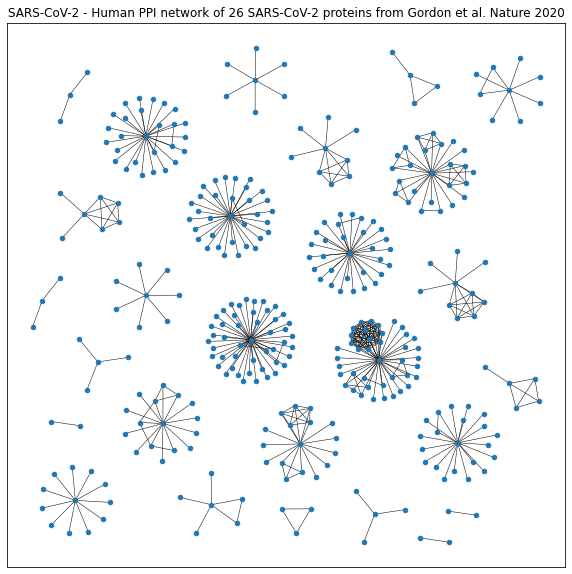

In [ ]:
# #Load the graph
G_sarscov2_original = nx.read_graphml("./Networks/HEK293T_SARS-CoV-2.graphml")

# Define position of each node
pos = nx.nx_agraph.graphviz_layout(G_sarscov2_original,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G_sarscov2_original, pos=pos,node_size=20)
nx.draw_networkx_edges(G_sarscov2_original, pos=pos,width=0.5,arrows=False)
# #Uncomment to label by node number
# nx.draw_networkx_labels(G_sarscov2,pos=pos, font_size=8, alpha=1)
plt.title("SARS-CoV-2 - Human PPI network of 26 SARS-CoV-2 proteins from Gordon et al. Nature 2020")
plt.show()

We can also color them according to the type of protein (virus protein vs human protein) by doing some manipulations

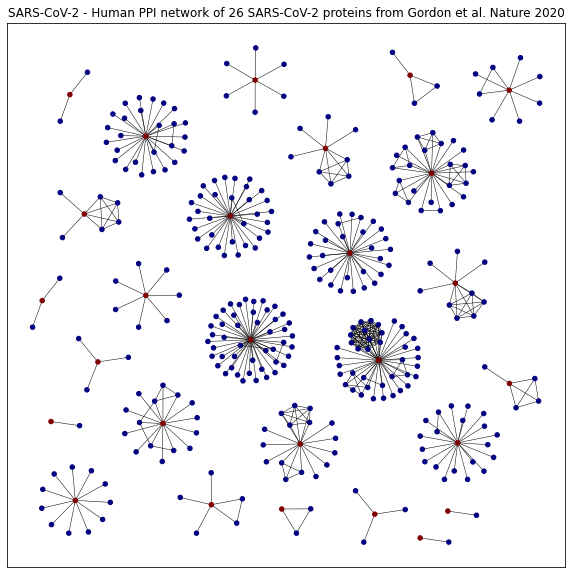

In [ ]:
from itertools import count
# get unique groups
groups = set(nx.get_node_attributes(G_sarscov2,'Bait_Boolean').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G_sarscov2.nodes()
colors = [mapping[G_sarscov2.nodes[n]['Bait_Boolean']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_sarscov2)
pos = nx.nx_agraph.graphviz_layout(G_sarscov2_original,prog='neato')
nx.draw_networkx_nodes(G_sarscov2, pos, nodelist=nodes, node_color=colors, label=None, node_size=20, cmap=plt.cm.jet)
nx.draw_networkx_edges(G_sarscov2, pos,width=0.5,arrows=False)
# #Uncomment to label by node number
#nx.draw_networkx_labels(G_sarscov2,pos=pos, font_size=8, alpha=1)
plt.title("SARS-CoV-2 - Human PPI network of 26 SARS-CoV-2 proteins from Gordon et al. Nature 2020")
plt.show()

***Red Miserables***

In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import collections

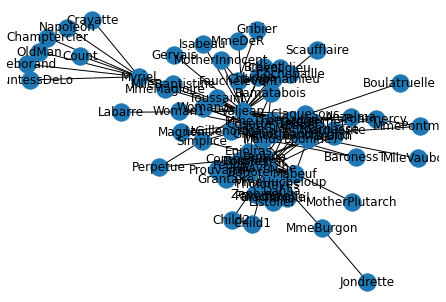

In [ ]:
# Load the graph
# G_karate = nx.karate_club_graph()
G_lesmis = nx.les_miserables_graph()
# Define position of each node 
pos = nx.spring_layout(G_lesmis)
# Plot the graph 
nx.draw(G_lesmis, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos )

In [ ]:
#G_lesmis.nodes() is a networkx object, we can convert it to a normal python list to manipulate it
#G_lesmis.edges() is a networkx object, we can convert it to a normal python list to manipulate it
lesmis_nodes =  list(G_lesmis.nodes())
lesmis_edges =  list(G_lesmis.edges())

print("Nodes",lesmis_nodes)
print("Edges",lesmis_edges)

Nodes ['Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']
Edges [('Na

In [ ]:
neighbors_node_Napoleon=list(G_lesmis.neighbors("Napoleon"))
neighbors_node_Myriel=list(G_lesmis.neighbors("Myriel"))
neighbors_node_MlleBaptistine=list(G_lesmis.neighbors("MlleBaptistine"))
print("neighborsNapoleon",neighbors_node_Napoleon)
print("neighborsMyriel",neighbors_node_Myriel)
print("neighbors nodeMlleBaptistine",neighbors_node_MlleBaptistine)

neighborsNapoleon ['Myriel']
neighborsMyriel ['Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean']
neighbors nodeMlleBaptistine ['Myriel', 'MmeMagloire', 'Valjean']


In [ ]:
# The nx.degree function outputs the degree of each node in the network
nx.degree(G_lesmis)

DegreeView({'Napoleon': 1, 'Myriel': 10, 'MlleBaptistine': 3, 'MmeMagloire': 3, 'CountessDeLo': 1, 'Geborand': 1, 'Champtercier': 1, 'Cravatte': 1, 'Count': 1, 'OldMan': 1, 'Valjean': 36, 'Labarre': 1, 'Marguerite': 2, 'MmeDeR': 1, 'Isabeau': 1, 'Gervais': 1, 'Listolier': 7, 'Tholomyes': 9, 'Fameuil': 7, 'Blacheville': 7, 'Favourite': 7, 'Dahlia': 7, 'Zephine': 7, 'Fantine': 15, 'MmeThenardier': 11, 'Thenardier': 16, 'Cosette': 11, 'Javert': 17, 'Fauchelevent': 4, 'Bamatabois': 8, 'Perpetue': 2, 'Simplice': 4, 'Scaufflaire': 1, 'Woman1': 2, 'Judge': 6, 'Champmathieu': 6, 'Brevet': 6, 'Chenildieu': 6, 'Cochepaille': 6, 'Pontmercy': 3, 'Boulatruelle': 1, 'Eponine': 11, 'Anzelma': 3, 'Woman2': 3, 'MotherInnocent': 2, 'Gribier': 1, 'MmeBurgon': 2, 'Jondrette': 1, 'Gavroche': 22, 'Gillenormand': 7, 'Magnon': 2, 'MlleGillenormand': 7, 'MmePontmercy': 2, 'MlleVaubois': 1, 'LtGillenormand': 4, 'Marius': 19, 'BaronessT': 2, 'Mabeuf': 11, 'Enjolras': 15, 'Combeferre': 11, 'Prouvaire': 9, 'Feuill

In [ ]:
# Through some manipulation, you can rank the nodes by degree in a list of tuples
degree_count = sorted(G_lesmis.degree, key=lambda x: x[1], reverse=True)
# Prepare two tuples that you can plot against each other
node, degree = zip(*degree_count)
print(node)
print(degree)

('Valjean', 'Gavroche', 'Marius', 'Javert', 'Thenardier', 'Fantine', 'Enjolras', 'Courfeyrac', 'Bossuet', 'Bahorel', 'Joly', 'MmeThenardier', 'Cosette', 'Eponine', 'Mabeuf', 'Combeferre', 'Feuilly', 'Myriel', 'Grantaire', 'Gueulemer', 'Babet', 'Claquesous', 'Tholomyes', 'Prouvaire', 'Montparnasse', 'Bamatabois', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Gillenormand', 'MlleGillenormand', 'Brujon', 'MmeHucheloup', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Fauchelevent', 'Simplice', 'LtGillenormand', 'MlleBaptistine', 'MmeMagloire', 'Pontmercy', 'Anzelma', 'Woman2', 'Toussaint', 'Marguerite', 'Perpetue', 'Woman1', 'MotherInnocent', 'MmeBurgon', 'Magnon', 'MmePontmercy', 'BaronessT', 'Child1', 'Child2', 'Napoleon', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'MmeDeR', 'Isabeau', 'Gervais', 'Scaufflaire', 'Boulatruelle', 'Gribier', 'Jondrette', 'MlleVaubois', 'MotherPlutarch')
(36, 22, 19, 17, 

<BarContainer object of 77 artists>

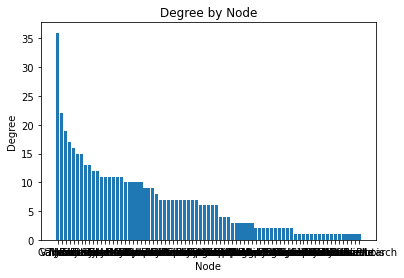

In [ ]:
# Plot the degree of each node
ax = plt.subplot(111)
ax.set_title('Degree by Node')
ax.set_xlabel('Node')
ax.set_ylabel('Degree')
ax.bar(node,degree)

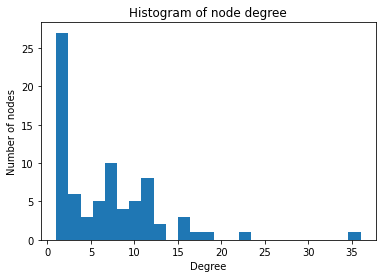

In [ ]:
plt.hist(degree,bins=25)
plt.title('Histogram of node degree')
plt.ylabel('Number of nodes')
plt.xlabel('Degree')
plt.show()